# Exemplos de ajuste linear

In [1]:
using Plots

## Salário e grau de instrução

* Como nosso primeiro exemplo, vamos comparar o salário anual médio com o grau de instrução.

* Dados dos EUA, obtidos de [US Bureau of Labor Statistics: Learn more, earn more: Education leads to higher wages, lower unemployment](https://www.bls.gov/careeroutlook/2020/data-on-display/education-pays.htm).


| Nível de instrução  | Média de salário semanal (USD\$) | Taxa de desemprego (%)|
| ---                  | ---  | --- |
| Doutorado            | 1883 | 1,1 |
| Profissional         | 1861 | 1,6 |
| Mestrado             | 1497 | 2,0 |
| Graduação            | 1248 | 2,2 |
| Associado*            |  887 | 2,7 |
| Graduação incompleta |  833 | 3.3 |
| Ensino Médio         |  746 | 3,7 |
| Ensino Fundamental   |  592 | 5,4 |

* *Associado* é um grau conferido em algumas instituições de nível superior, em cursos de dois a três anos.

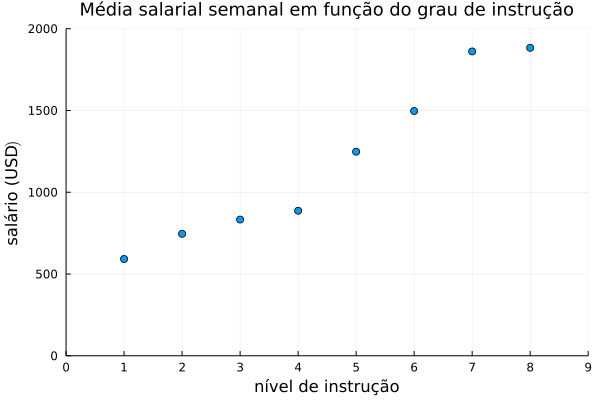

In [2]:
y = [592, 746, 833, 887, 1248, 1497, 1861, 1883]
plot(y, seriestype = :scatter, xlims=(0,9), ylims=(0,2000),
    xticks=0:9, xaxis = "nível de instrução", yaxis="salário (USD\$)", 
    title="Média salarial semanal em função do grau de instrução", 
    titlefont=12, legend=false)

* Queremos ajustar um modelo simples linear $y=\beta_0 + \beta_1 x$, onde $x$ representa o grau de instrução e $y$, o salário.

* O grau de instrução não tem uma escala muito bem definida como exibido acima, mas seguimos assim para efeitos ilustrativos, do método de mínimos quadrados.

* De qualquer forma, é nítida a relação entre as duas variáveis.

* Queremos, então, minimizar o erro quadrático $E=\sum_i |y_j - \beta_0 + \beta_1 x_j|^2$.

* Para isso, montamos a matrix de Vandermonde
$$ A = \left[ \begin{matrix} 1 & x_1 \\ 1 & x_2 \\ \ldots & \ldots \\ 1 & x_8 \end{matrix} \right] = \left[ \begin{matrix} 1 & 1 \\ 1 & 2 \\\ldots & \ldots \\ 1 & 8 \end{matrix} \right]
$$

* E minimizamos $E = \|\mathbf{y} - A\mathbf{x}\|^2$, onde
$$ \mathbf{x} = (x_i)_{i=1}^8 = (1,\ldots, 8) \quad \mathbf{y} = (y_i)_i = (592, 746, 833, 887, 1248, 1497, 1861, 1883).
$$

* Solucionamos isso em julia com o operador [`\`](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/generic.jl#L1144).

* Antes, definimos a matrix $A$.

In [3]:
A = [1 1; 1 2; 1 3; 1 4; 1 5; 1 6; 1 7; 1 8]

8×2 Matrix{Int64}:
 1  1
 1  2
 1  3
 1  4
 1  5
 1  6
 1  7
 1  8

* Também podemos fazer isso de forma mais programática:

In [4]:
A = [ones(8) collect(1:8)]

8×2 Matrix{Float64}:
 1.0  1.0
 1.0  2.0
 1.0  3.0
 1.0  4.0
 1.0  5.0
 1.0  6.0
 1.0  7.0
 1.0  8.0

* O vetor $\mathbf{y}$ já foi definido acima, quando da exibição do gráfico.

* A solução do problema de mínimos quadrados é dada por `A\y`.

In [5]:
x = A\y

2-element Vector{Float64}:
 284.53571428571445
 201.9642857142857

* Isso nos dá $\beta_0=284.54$ e $\beta_1=201.96$.

* E a visualização do modelo ajustado.

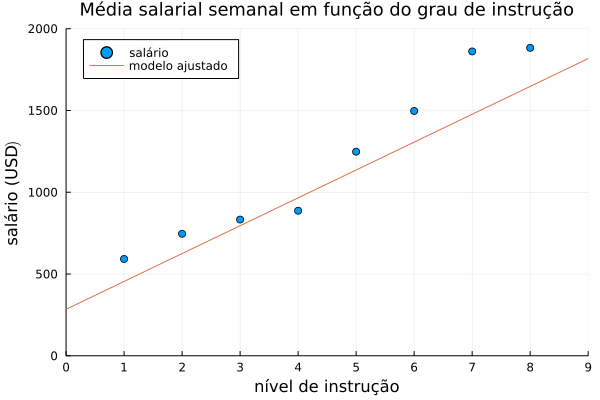

In [6]:
y = [592, 746, 833, 887, 1248, 1497, 1861, 1883]
plot(y, seriestype = :scatter, xlims=(0,9), ylims=(0,2000),
    xticks=0:9, xaxis = "nível de instrução", yaxis="salário (USD\$)", 
    label="salário", title="Média salarial semanal em função do grau de instrução", 
    titlefont=12, legend=:topleft)
plot!([(0,x[1]), (9,x[2]*9)], label="modelo ajustado")

## O operador \

* Em Julia, o operador \ funciona de maneira diferente de acordo com o tipo de matriz (um polialgoritmo).

* Se $A$ for uma matriz quadrada, é feita uma decomposição $LU$ (como um produto de uma matriz triangular inferior e uma superior).

* Se $A$ for retangular, é feita uma decomposição $QR$.

* Este não é um curso de computação científica, mas, para os interessados, é possível, no Julia, ver facilmente a implementação de uma operador.

* Podemos ver onde fica o código fonte para uma expressão `expr` com o comando `@which expr`.

* `@which` pertence ao pacote padrão [InteractiveUtils](https://docs.julialang.org/en/v1/stdlib/InteractiveUtils/), que é carregado automaticamente em modo iterativo (e.g. REPL, Jupyter, Pluto), mas aqui carregamos explicitamente.

In [7]:
using InteractiveUtils
@which A\y

\(A::AbstractMatrix, B::AbstractVecOrMat) in LinearAlgebra at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/generic.jl:1128

* A localização é em relação à instalação local do Julia.

* Os códigos de todos os pacotes do Julia, no entanto, estão todos disponíveis no github e são praticamente todos escritos na própria linguagem julia.

* No caso acima, a expressão `A\b` está no pacote padrão `LinearAlgebra`, no aquivo `generic.jl`, na linha 1122.

* Esse pacote está disponível em [github.com/JuliaLang/julia/stdlib/LinearAlgebra](https://github.com/JuliaLang/julia/tree/master/stdlib/LinearAlgebra), e o arquivo, em [generic.jl](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/generic.jl).

* A linha exata pode variar um pouco do listado pelo comando `@which`, pois o código já pode ter tido modificações depois da instalação local (que por sua vez também pode ser atualizada).

* No caso acima, o link exato é [generic.jl#L1125](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/generic.jl#L1125)

## Exercícios

1. Faço o ajuste de um modelo linear aos dados de *taxa de desemprego* em relação ao *grau de instrução*, exibidos no texto, obtidos da fonte [US Bureau of Labor Statistics: Learn more, earn more: Education leads to higher wages, lower unemployment](https://www.bls.gov/careeroutlook/2020/data-on-display/education-pays.htm).

2. Buscar os dados de salário e nível de instrução no Brasil e fazer o ajuste de um modelo linear representando a relação entre os dois.